# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [270]:
df = pd.read_csv("Supplement_Sales_Weekly_Expanded.csv")
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [271]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [273]:
num_cols = df.select_dtypes(include="number").columns.to_list()
cat_cols = df.select_dtypes(include=['object']).columns.to_list()

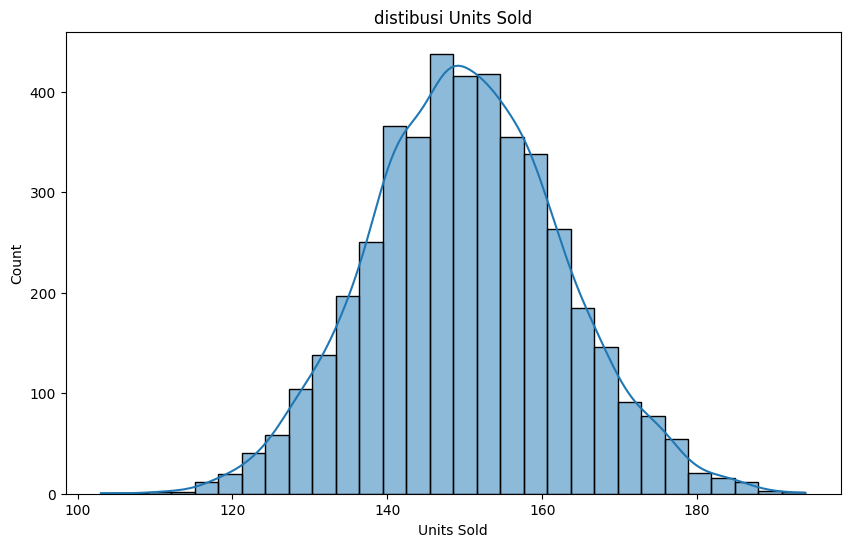

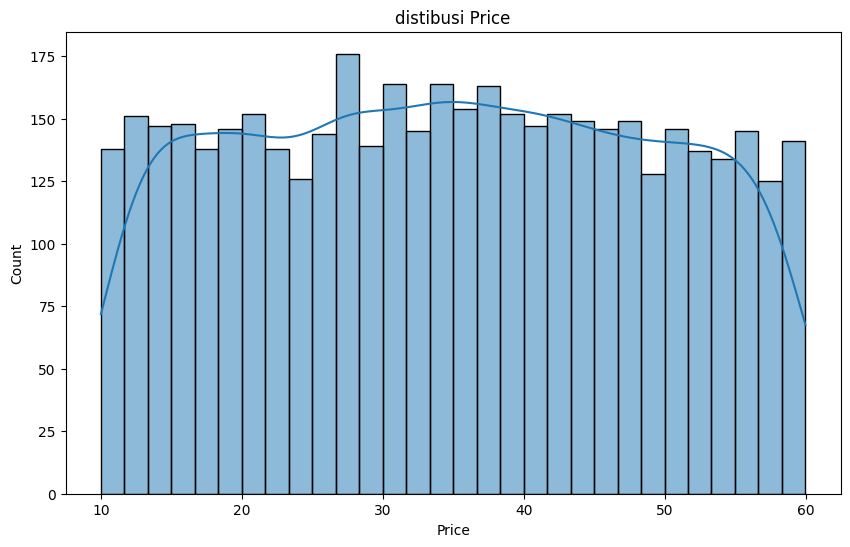

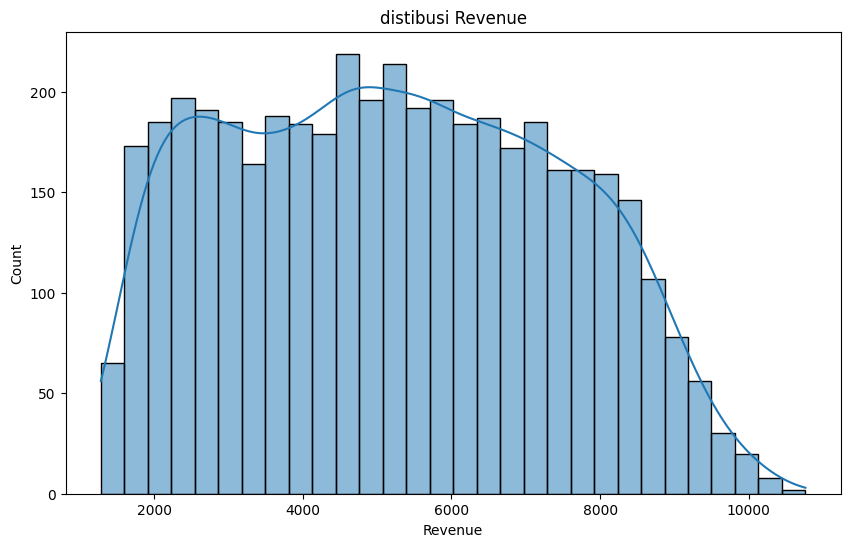

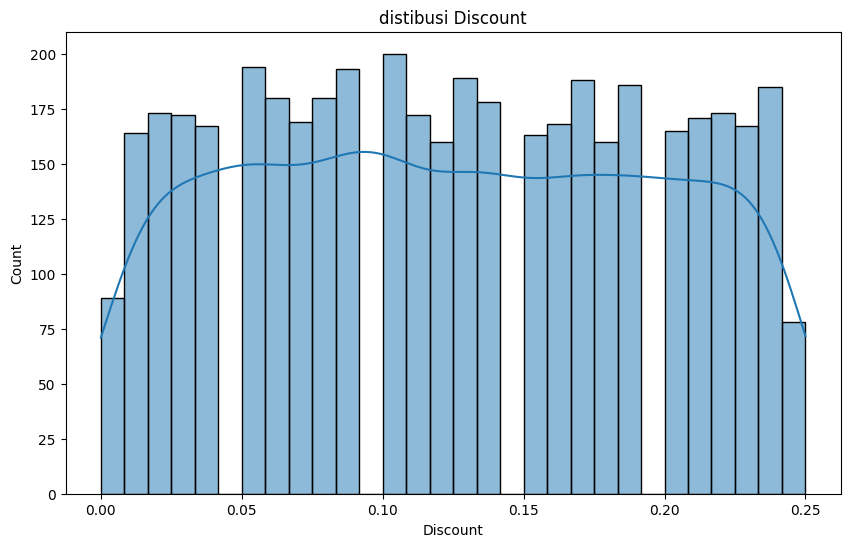

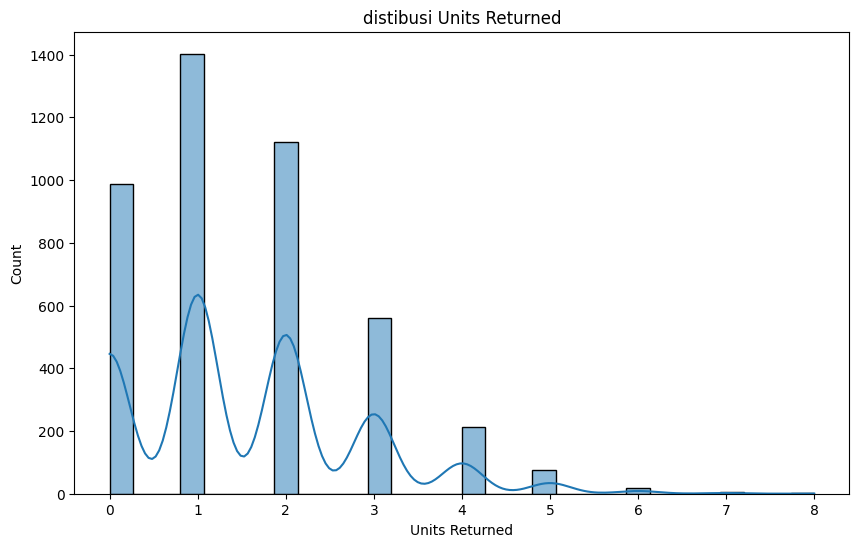

In [274]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f"distibusi {col}")
    plt.show()

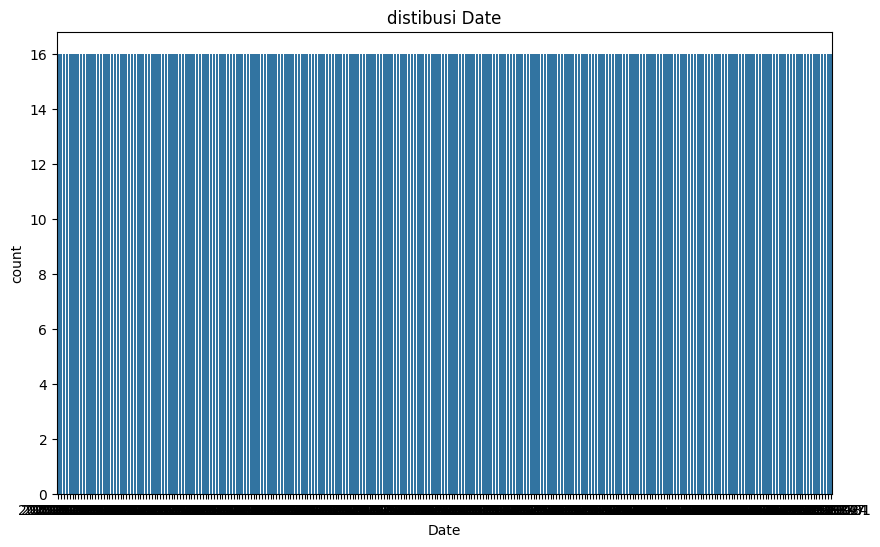

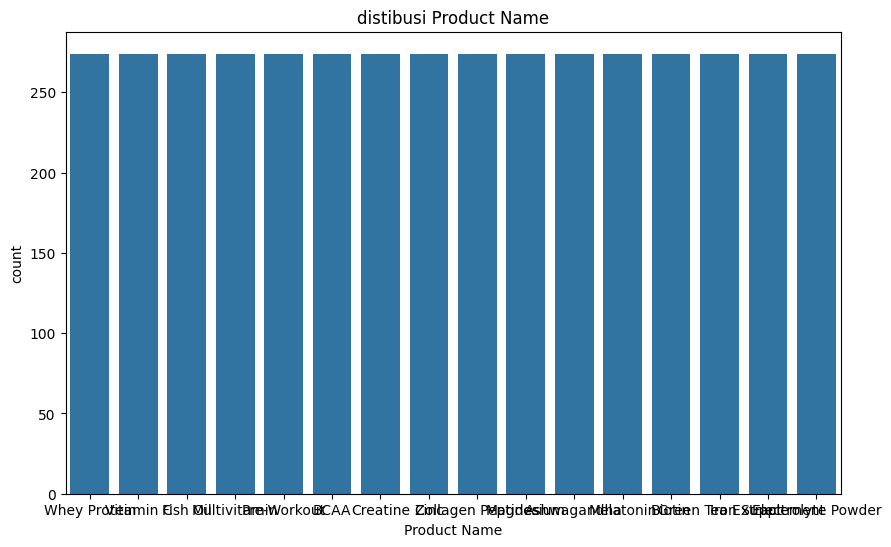

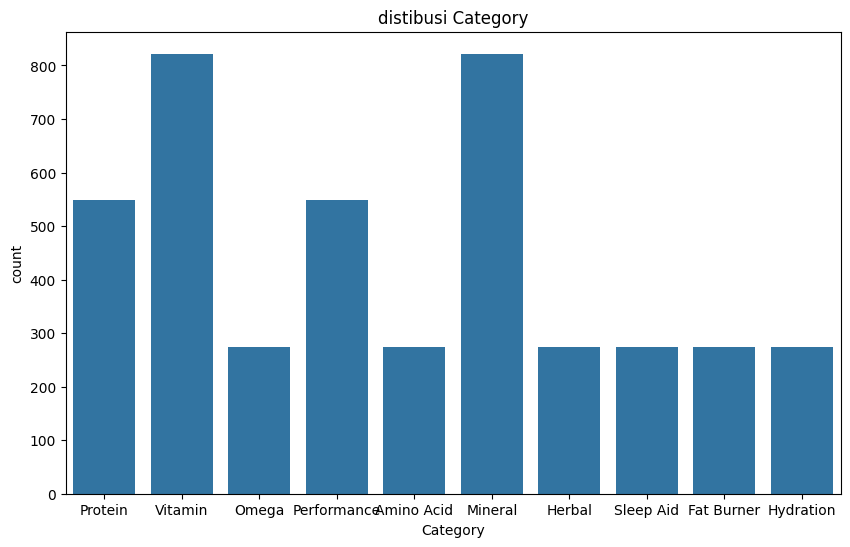

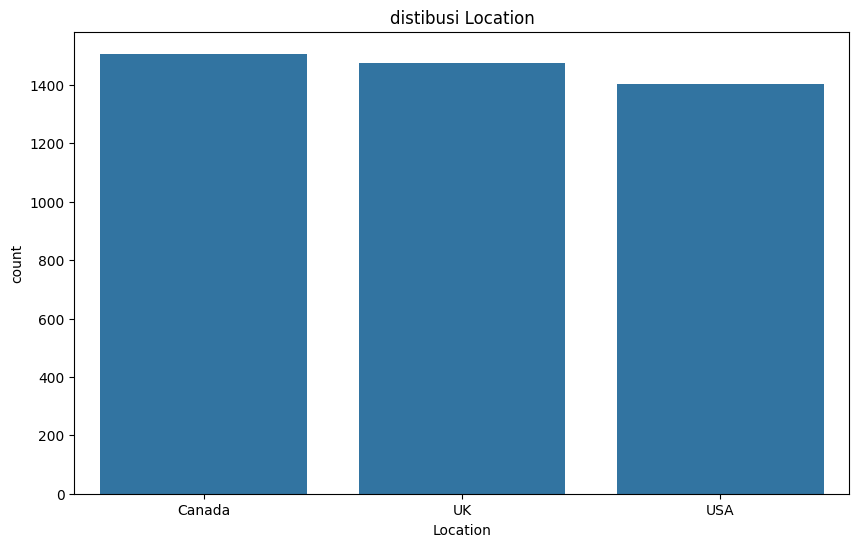

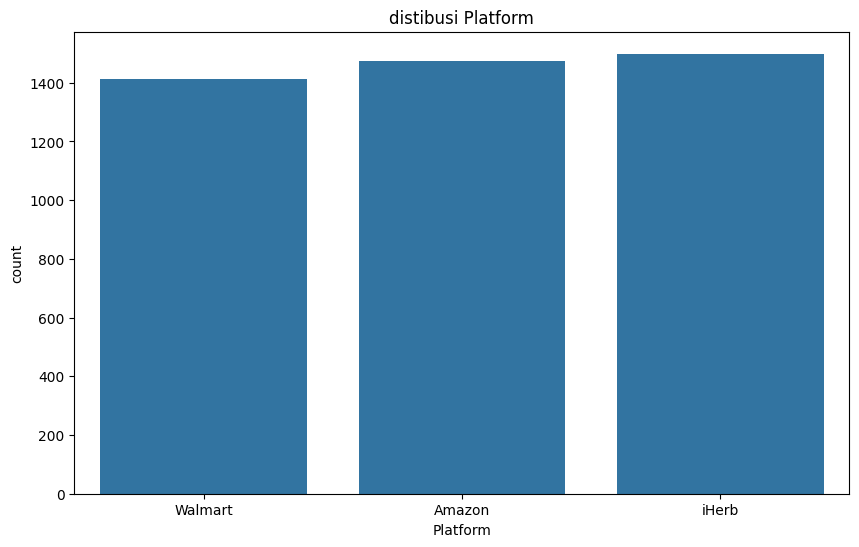

In [275]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f"distibusi {col}")    
    plt.show()

<Axes: xlabel='Category'>

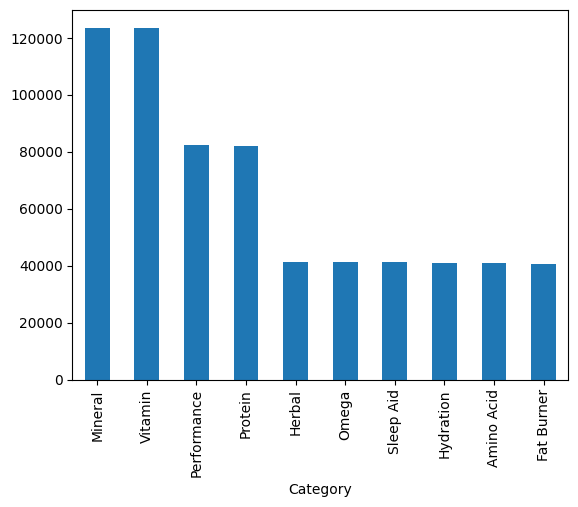

In [276]:
df.groupby("Category")["Units Sold"].sum().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Product Name'>

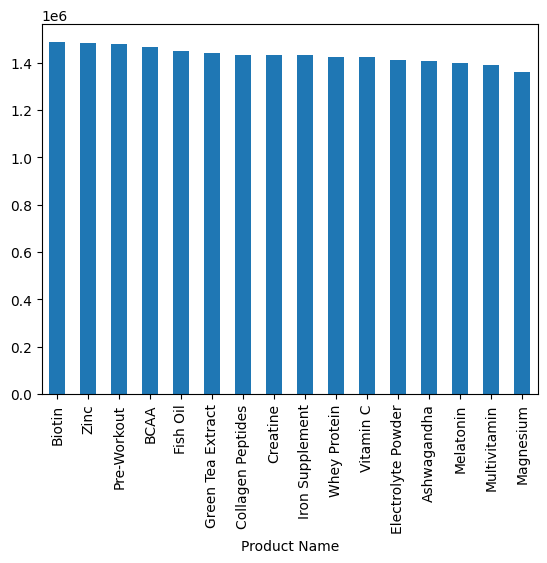

In [277]:
df.groupby("Product Name")["Revenue"].sum().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Product Name'>

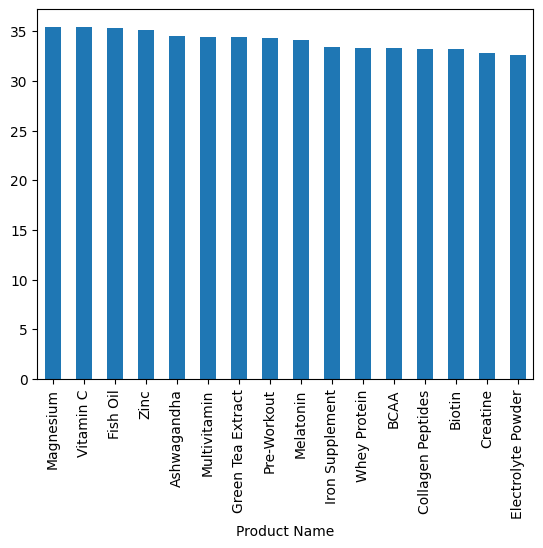

In [278]:
df.groupby("Product Name")["Discount"].sum().sort_values(ascending=False).plot(kind="bar")

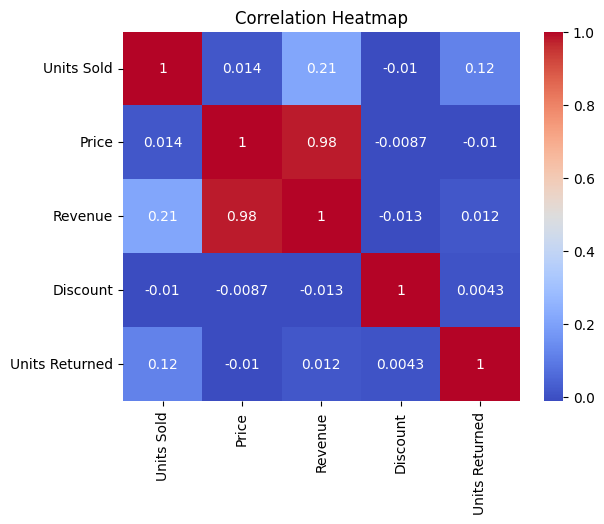

In [279]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [280]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Text(0.5, 1.0, 'Total Revenue per Year')

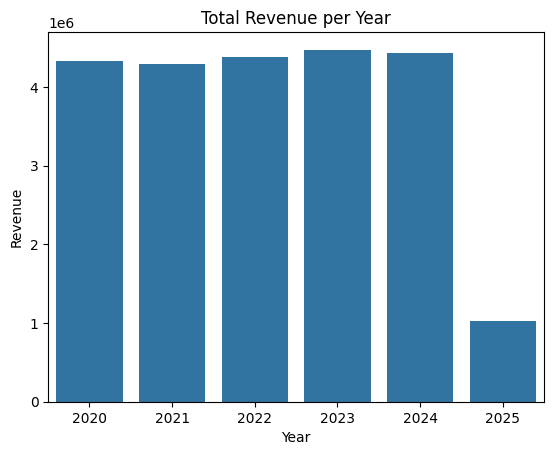

In [281]:
monthly_avg = df.groupby('Year')['Revenue'].sum().reset_index()

sns.barplot(x='Year', y='Revenue', data=monthly_avg)
plt.title('Total Revenue per Year')

Text(0.5, 1.0, 'Total Revenue per Month')

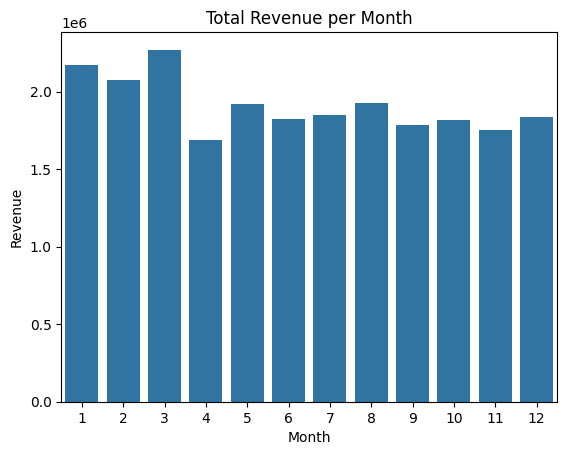

In [282]:
monthly_avg = df.groupby('Month')['Revenue'].sum().reset_index()
sns.barplot(x='Month', y='Revenue', data=monthly_avg)
plt.title('Total Revenue per Month')

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [295]:
cat_features = ["Product Name", "Category", "Location", "Platform"]
num_features = ["Units Sold", "Price", "Discount", "Units Returned"]

In [296]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
    
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [297]:
y = df["Revenue"]
X = df.drop(columns=["Revenue", "Date"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
print(f'X_train shape: {X_train_proc.shape}')
print(f'X_test shape: {X_test_proc.shape}')

X_train shape: (3507, 36)
X_test shape: (877, 36)


In [299]:
features_name = preprocessor.get_feature_names_out()
print(features_name)

['num__Units Sold' 'num__Price' 'num__Discount' 'num__Units Returned'
 'cat__Product Name_Ashwagandha' 'cat__Product Name_BCAA'
 'cat__Product Name_Biotin' 'cat__Product Name_Collagen Peptides'
 'cat__Product Name_Creatine' 'cat__Product Name_Electrolyte Powder'
 'cat__Product Name_Fish Oil' 'cat__Product Name_Green Tea Extract'
 'cat__Product Name_Iron Supplement' 'cat__Product Name_Magnesium'
 'cat__Product Name_Melatonin' 'cat__Product Name_Multivitamin'
 'cat__Product Name_Pre-Workout' 'cat__Product Name_Vitamin C'
 'cat__Product Name_Whey Protein' 'cat__Product Name_Zinc'
 'cat__Category_Amino Acid' 'cat__Category_Fat Burner'
 'cat__Category_Herbal' 'cat__Category_Hydration' 'cat__Category_Mineral'
 'cat__Category_Omega' 'cat__Category_Performance' 'cat__Category_Protein'
 'cat__Category_Sleep Aid' 'cat__Category_Vitamin' 'cat__Location_Canada'
 'cat__Location_UK' 'cat__Location_USA' 'cat__Platform_Amazon'
 'cat__Platform_Walmart' 'cat__Platform_iHerb']


In [300]:
output_path = "./supplement_sales_preprocessed"
os.makedirs(output_path, exist_ok=True)

features_name = preprocessor.get_feature_names_out()
train_df = pd.DataFrame(X_train_proc, columns=features_name)
train_df["Revenue"] = y_train.values
train_path = os.path.join(output_path, "sales_train_preprocessed.csv")
train_df.to_csv(train_path, index=False)

test_df = pd.DataFrame(X_test_proc, columns=features_name)
test_df["Revenue"] = y_test.values
test_path = os.path.join(output_path, "sales_test_preprocessed.csv")
test_df.to_csv(test_path, index=False)